1D con e senza drift usando mu_true

Fit parameters: (np.float64(164.15556441644486), np.float64(23.900212573730904), np.float64(-14.334812035909046), np.float64(0.09759635789365428))
[np.float64(4.616223677135068), np.float64(7.047363424368754), np.float64(5.803982062910265), np.float64(3.6735676922060776), np.float64(1.124777697532025), np.float64(1.4543222374138054), np.float64(3.369363744836946), np.float64(3.63541905405431), np.float64(2.5058317456332304), np.float64(1.5148339828478186), np.float64(3.4763070003011762), np.float64(3.559399729908961), np.float64(3.0599672861401217), np.float64(4.0271696210313905), np.float64(4.921274775514647), np.float64(6.313026825843991), np.float64(3.491336263085813), np.float64(2.0319646497792263), np.float64(-0.707757979941718), np.float64(3.5630325982674265), np.float64(5.4759476462844106), np.float64(6.442471776101385), np.float64(4.454464640200015), np.float64(3.3646080554397457), np.float64(3.1257584333425967), np.float64(5.813542800444097), np.float64(1.2485209613955988), np

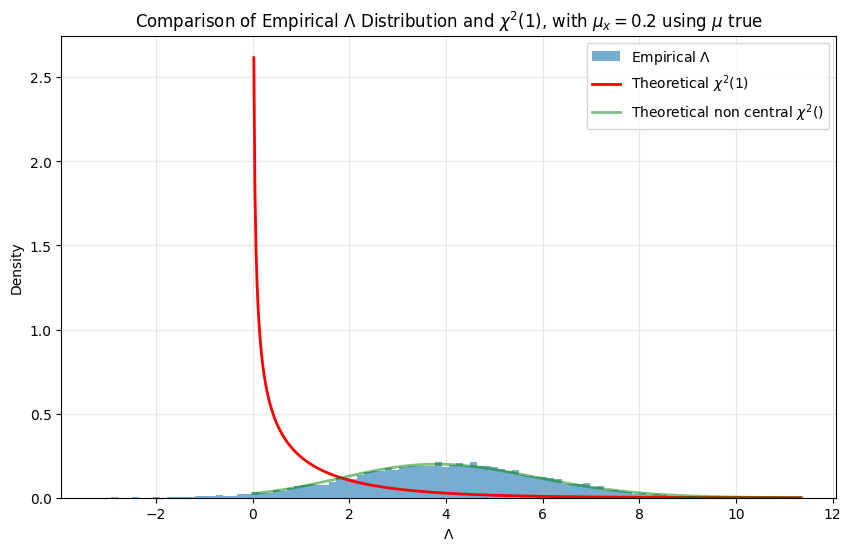

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2

n_simulations = 10000  # Number of simulations
n_steps = 100  # Steps in each trajectory
mu_x_true = 0.2
std_dev_x_true = 1 

def compute_log_likelihood(x_steps, mu_x, std_dev_x):
    """Compute log-likelihood for a given trajectory."""
    log_likelihood_x = np.sum(norm.logpdf(x_steps, loc=mu_x, scale=std_dev_x))
    return log_likelihood_x

Lambda_values = []

for _ in range(n_simulations):
    x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, n_steps)
    
    
    #std_x_est = np.std(x_steps_observed)
    #mu_x_est = np.mean(x_steps_observed)
    log_likelihood_ML = compute_log_likelihood(
        x_steps_observed, 
        mu_x=mu_x_true,
        std_dev_x=std_dev_x_true
    )

    
    log_likelihood_alt = compute_log_likelihood(
        x_steps_observed, 
        mu_x=-mu_x_true,
        std_dev_x=std_dev_x_true
    )
    
    #KL = 2 * mu_x_est**2/std_x_est**2
    Lambda = (log_likelihood_ML - log_likelihood_alt)/2 #capire perché c'è questo /2 anziché *2
    Lambda_values.append(Lambda)

x_range = np.linspace(0, max(Lambda_values), 500)
chi1_pdf = chi2.pdf(x_range, df=1)

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)
#chi2_pdf_fit = st.ncx2.pdf(x_range, lmd, dof)
print("Fit parameters:", params)
print(Lambda_values)
plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non central $\chi^2()$", color='green', alpha= 0.5, lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$ using $\mu$ true")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



1D senza drift usando mu_est

KL = 0.02045421712520197
Lambda media= 1.0227108562600984
Fit parameters: (np.float64(0.8943145237536274), np.float64(0.4642342729270065), np.float64(5.075790454611705e-09), np.float64(0.8123369313284263))


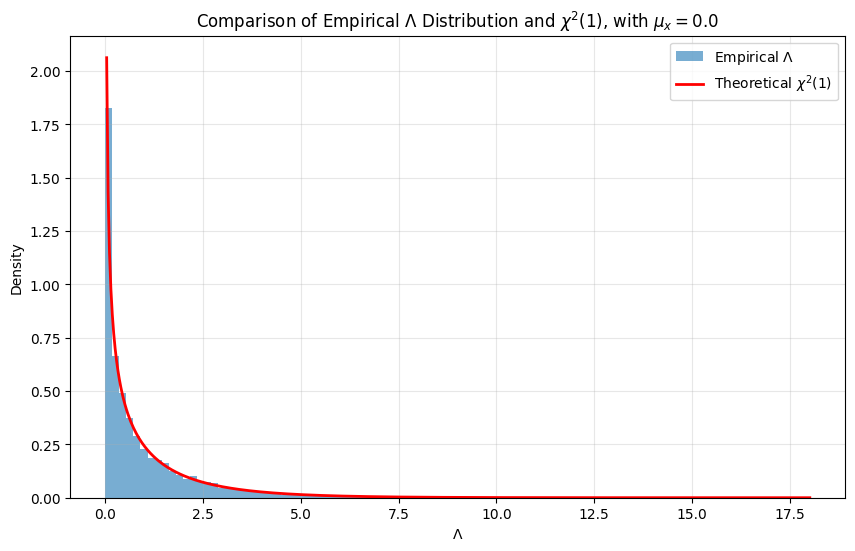

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2

n_simulations = 10000  # Number of simulations
n_steps = 100  # Steps in each trajectory
mu_x_true = 0.0
std_dev_x_true = 1 

def compute_log_likelihood(x_steps, mu_x, std_dev_x):
    log_likelihood_x = np.sum(norm.logpdf(x_steps, loc=mu_x, scale=std_dev_x))
    return log_likelihood_x

Lambda_values = []
KL_values = []

for _ in range(n_simulations):
    # Generate a trajectory under H0 (no drift)
    x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, n_steps)
    
    # Log-likelihood (Maximum likelihood estimation)
    std_x_est = np.std(x_steps_observed)
    mu_x_est = np.mean(x_steps_observed)
    log_likelihood_ML = compute_log_likelihood(
        x_steps_observed, 
        mu_x=mu_x_est,
        std_dev_x=std_x_est
    )

     # Log-likelihood under H0
    log_likelihood_alt = compute_log_likelihood(
        x_steps_observed, 
        mu_x=-mu_x_est,
        std_dev_x=std_x_est
    )
    
    KL = 2 * mu_x_est**2/std_x_est**2
    KL_values.append(KL)
    Lambda = (log_likelihood_ML - log_likelihood_alt)/2 #capire perché c'è questo /2 anziché *2
    Lambda_values.append(Lambda)

KL_media = np.mean(KL_values)
print(f"KL stimata= {KL_media}")
x_range = np.linspace(0, max(Lambda_values), 500)
chi1_pdf = chi2.pdf(x_range, df=1)
Lambda_media = np.mean(Lambda_values)
print(f"Lambda media= {Lambda_media}")

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)
#chi2_pdf_fit = st.ncx2.pdf(x_range, lmd, dof)
print("Fit parameters:", params)


plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
#plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non central $\chi^2(2)$", color='red', lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
"""


1D con drift usando mu_est

KL = 0.10364011429562499
Lambda media= 5.1820057147812495
Fit parameters: (np.float64(1.104466141353583), np.float64(1.3776186151235597), np.float64(2.9234614373763174e-07), np.float64(1.5559936162538894))


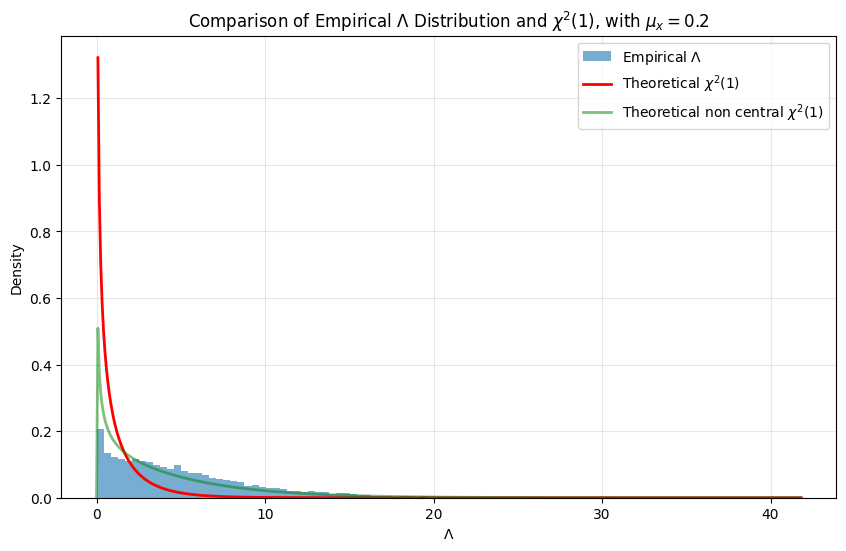

In [ ]:
""" per ora accantiniamo queste celle fatte con i cicli for
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2

n_simulations = 10000  # Number of simulations
n_steps = 100  # Steps in each trajectory
mu_x_true = 0.2
std_dev_x_true = 1 

def compute_log_likelihood(x_steps, mu_x, std_dev_x):
    log_likelihood_x = np.sum(norm.logpdf(x_steps, loc=mu_x, scale=std_dev_x))
    return log_likelihood_x

Lambda_values = []
KL_values = []

for _ in range(n_simulations):
    # Generate a trajectory under H0 (no drift)
    x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, n_steps)
    
    # Log-likelihood (Maximum likelihood estimation)
    std_x_est = np.std(x_steps_observed)
    mu_x_est = np.mean(x_steps_observed)
    log_likelihood_ML = compute_log_likelihood(
        x_steps_observed, 
        mu_x=mu_x_est,
        std_dev_x=std_x_est
    )

     # Log-likelihood under H0
    log_likelihood_alt = compute_log_likelihood(
        x_steps_observed, 
        mu_x=-mu_x_est,
        std_dev_x=std_x_est
    )
    
    KL = 2 * mu_x_est**2/std_x_est**2
    KL_values.append(KL)
    Lambda = (log_likelihood_ML - log_likelihood_alt)/2 #capire perché c'è questo /2 anziché *2
    Lambda_values.append(Lambda)

KL_media = np.mean(KL_values)
print(f"KL stimata= {KL_media}")
x_range = np.linspace(0, max(Lambda_values), 500)
chi1_pdf = chi2.pdf(x_range, df=1)
Lambda_media = np.mean(Lambda_values)
print(f"Lambda media= {Lambda_media}")

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)
#chi2_pdf_fit = st.ncx2.pdf(x_range, lmd, dof)
print("Fit parameters:", params)
plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non central $\chi^2(1)$", color='green', alpha=0.5, lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

"""

1D con drift togliendo il ciclo for: vettorializziamo il codice tramite numpy

KL stimata= 0.1026051052789563
Lambda media= 5.1302552639478165


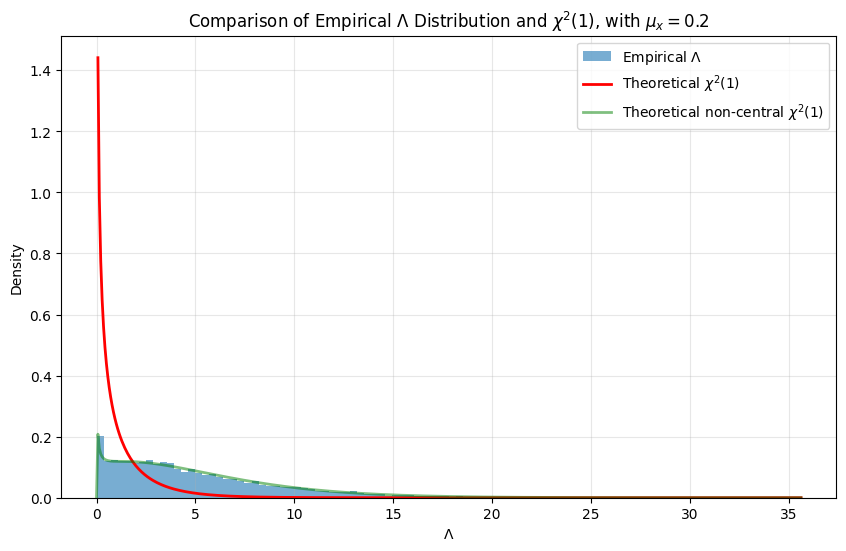

Fit parameters for non-central chi-squared distribution: (np.float64(0.9774582744687068), np.float64(4.217295365606145), np.float64(5.100982320980416e-07), np.float64(0.9806086157005205))


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2

n_simulations = 10000  # Numero di simulazioni
n_steps = 100  # Passi nelle traiettorie
mu_x_true = 0.2
std_dev_x_true = 1 

x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, (n_simulations, n_steps))

#uso numpy e vettorializzo il codice, così non devo più fare il ciclo for
mu_x_est = np.mean(x_steps_observed, axis=1)  
std_x_est = np.std(x_steps_observed, axis=1, ddof=1)  
log_likelihood_ML = np.sum(norm.logpdf(x_steps_observed, loc=mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)
log_likelihood_alt = np.sum(norm.logpdf(x_steps_observed, loc=-mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)

KL_values = 2 * (mu_x_est ** 2 / std_x_est ** 2)
Lambda_values = (log_likelihood_ML - log_likelihood_alt) / 2  # Qui manteniamo il /2

KL_media = np.mean(KL_values)
Lambda_media = np.mean(Lambda_values)

print(f"KL stimata= {KL_media}")
print(f"Lambda media= {Lambda_media}")

x_range = np.linspace(0, max(Lambda_values), 500)
chi1_pdf = chi2.pdf(x_range, df=1)

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)

plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non-central $\chi^2(1)$", color='green', alpha=0.5, lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Fit parameters for non-central chi-squared distribution:", params)


1D senza ciclo for senza drift

KL stimata= 0.019816009164523394
Lambda media= 0.9908004582261696


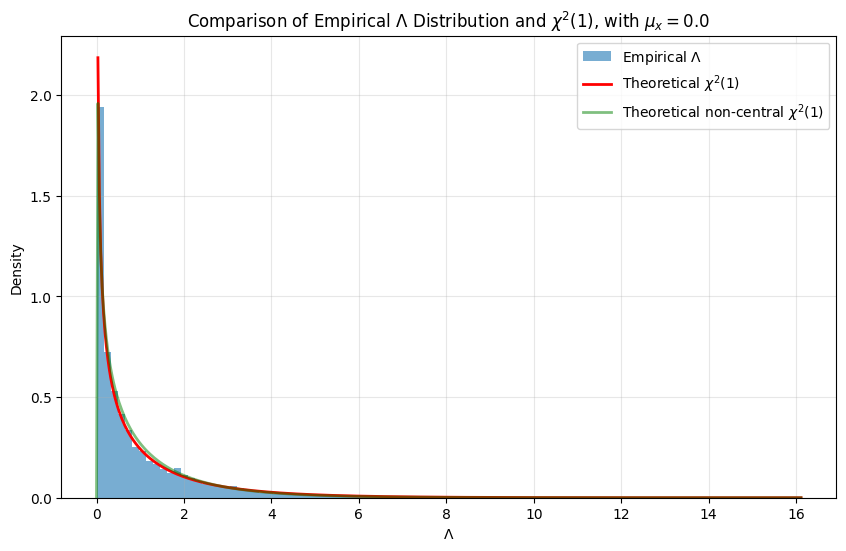

Fit parameters for non-central chi-squared distribution: (np.float64(1.1878787281389145), np.float64(9.852008058886333e-05), np.float64(1.6657907053740925e-08), np.float64(0.8213331078578883))


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2

n_simulations = 10000  # Numero di simulazioni
n_steps = 100  # Passi nelle traiettorie
mu_x_true = 0.
std_dev_x_true = 1 

x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, (n_simulations, n_steps))

#uso numpy e vettorializzo il codice, così non devo più fare il ciclo for
mu_x_est = np.mean(x_steps_observed, axis=1)  
std_x_est = np.std(x_steps_observed, axis=1, ddof=1)  
log_likelihood_ML = np.sum(norm.logpdf(x_steps_observed, loc=mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)
log_likelihood_alt = np.sum(norm.logpdf(x_steps_observed, loc=-mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)

KL_values = 2 * (mu_x_est ** 2 / std_x_est ** 2)
Lambda_values = (log_likelihood_ML - log_likelihood_alt) / 2  # Qui manteniamo il /2

KL_media = np.mean(KL_values)
Lambda_media = np.mean(Lambda_values)

print(f"KL stimata= {KL_media}")
print(f"Lambda media= {Lambda_media}")

x_range = np.linspace(0, max(Lambda_values), 500)
chi1_pdf = chi2.pdf(x_range, df=1)

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)

plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non-central $\chi^2(1)$", color='green', alpha=0.5, lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Fit parameters for non-central chi-squared distribution:", params)

1D con drif usando XGBoost

/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing fold 1/5
Training model with train size 8000
[0]	validation_0-logloss:0.69340
[1]	validation_0-logloss:0.69353
[2]	validation_0-logloss:0.69441
[3]	validation_0-logloss:0.69455
[4]	validation_0-logloss:0.69583
[5]	validation_0-logloss:0.69655
[6]	validation_0-logloss:0.69812
[7]	validation_0-logloss:0.69852
[8]	validation_0-logloss:0.69943
[9]	validation_0-logloss:0.70029
[10]	validation_0-logloss:0.70202
Time irreversibility of the test set: 0.0021937862038612366
Processing fold 2/5
Training model with train size 8000
[0]	validation_0-logloss:0.69234
[1]	validation_0-logloss:0.69220
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69331
[4]	validation_0-logloss:0.69397
[5]	validation_0-logloss:0.69407
[6]	validation_0-logloss:0.69479
[7]	validation_0-logloss:0.69581
[8]	validation_0-logloss:0.69565
[9]	validation_0-logloss:0.69699
[10]	validation_0-logloss:0.69704
[11]	validation_0-logloss:0.69813
Time irreversibility of the test set: 0.00537144485861063
Processi

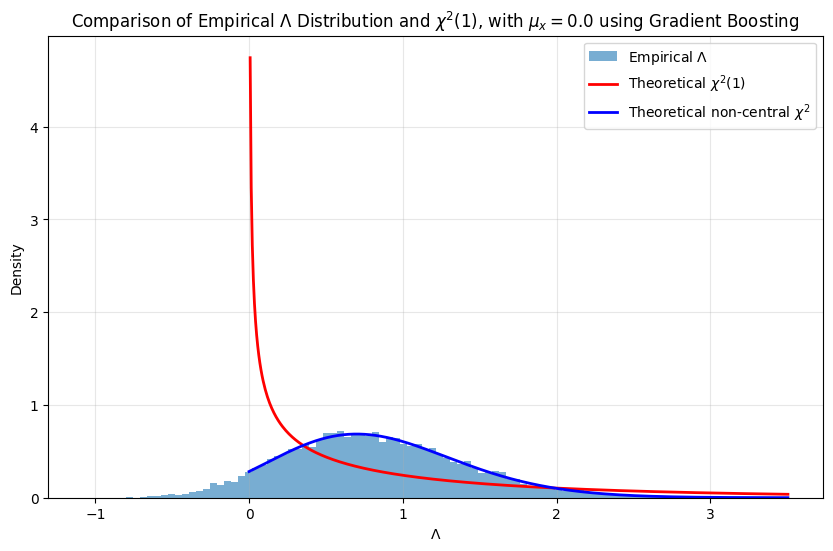

Fit parameters for non-central chi-squared distribution: (np.float64(39.19348093710073), np.float64(12.141360589575061), np.float64(-1.871143194537273), np.float64(0.052516580595956514))


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2
from xgboost import XGBClassifier
import time_irreversibility_estimator as ie


n_simulations = 10000  # Numero di simulazioni
n_steps = 100  # Passi nelle traiettorie
mu_x_true = 0.0
std_dev_x_true = 1 

x_forward = np.cumsum(np.random.normal(mu_x_true, std_dev_x_true, (n_simulations, n_steps)), axis=1)
#x_backward = np.cumsum(np.random.normal(-mu_x_true, std_dev_x_true, (n_simulations, n_steps)), axis=1)
x_backward= -x_forward

X = np.vstack((x_forward, x_backward))  # Feature: intere traiettorie
y = np.concatenate((np.ones(n_simulations), np.zeros(n_simulations)))  # Target: 1 = Forward, 0 = Backward

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X, y)

#ATTENZIONE: se prima potevo definire una funzione per calcolare le likelihood, ora non posso più farlo. Perché?
#Perché la likelihood si può calcolare solo se si conosce la distribuzione di probabilità, e in questo caso non la conosco. In questo caso stimiamo la probabilità condiziona con il machine learning
p_forward = clf.predict_proba(X)[:, 1]  # Probabilità stimata di forward

Lambda_values = np.log(p_forward[:n_simulations]) - np.log(1 - p_forward[:n_simulations])

x_range = np.linspace(0, max(Lambda_values), 500)
chi2_pdf = chi2.pdf(x_range, df=1)

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)

#aggiungo lo stimatore di KL fatto da Chri
encoding_fun = lambda x: np.diff(x, axis=0)
estimator = ie.TimeIrreversibilityEstimator(interaction_constraints=None, verbose=True, random_state=0)
irreversibility_value = estimator.fit_predict(x_forward=x_forward, x_backward=x_backward, encoding_fun=encoding_fun)
print(f"Estimated time irreversibility (KL): {irreversibility_value}")
print(f"KL teorica = {2*mu_x_true**2/std_dev_x_true**2}")

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi2_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non-central $\chi^2$", color='blue', lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$ using Gradient Boosting")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Stampa dei parametri stimati della distribuzione non-centrale chi-quadro
print("Fit parameters for non-central chi-squared distribution:", params)


/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing fold 1/5
Training model with train size 8000
[0]	validation_0-logloss:0.55746
[1]	validation_0-logloss:0.48639
[2]	validation_0-logloss:0.44366
[3]	validation_0-logloss:0.41780
[4]	validation_0-logloss:0.40281
[5]	validation_0-logloss:0.39271
[6]	validation_0-logloss:0.38702
[7]	validation_0-logloss:0.38194
[8]	validation_0-logloss:0.37982
[9]	validation_0-logloss:0.37864
[10]	validation_0-logloss:0.37858
[11]	validation_0-logloss:0.37791
[12]	validation_0-logloss:0.37725


/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/time_irreversibility_estimator/time_irreversibility_estimator.py:162: UserWarning: Encoding function is provided but it will not be used since x_forward and x_backward are provided.
  warnings.warn('Encoding function is provided but it will not be used since x_forward and x_backward are provided.')


[13]	validation_0-logloss:0.37731
[14]	validation_0-logloss:0.37674
[15]	validation_0-logloss:0.37725
[16]	validation_0-logloss:0.37745
[17]	validation_0-logloss:0.37795
[18]	validation_0-logloss:0.37770
[19]	validation_0-logloss:0.37791
[20]	validation_0-logloss:0.37871
[21]	validation_0-logloss:0.37908
[22]	validation_0-logloss:0.37910
[23]	validation_0-logloss:0.37994
Time irreversibility of the test set: 1.797695517539978
Processing fold 2/5
Training model with train size 8000
[0]	validation_0-logloss:0.55471
[1]	validation_0-logloss:0.48107
[2]	validation_0-logloss:0.43700
[3]	validation_0-logloss:0.41071
[4]	validation_0-logloss:0.39428
[5]	validation_0-logloss:0.38419
[6]	validation_0-logloss:0.37836
[7]	validation_0-logloss:0.37438
[8]	validation_0-logloss:0.37193
[9]	validation_0-logloss:0.37049
[10]	validation_0-logloss:0.36959
[11]	validation_0-logloss:0.37025
[12]	validation_0-logloss:0.37106
[13]	validation_0-logloss:0.37172
[14]	validation_0-logloss:0.37230
[15]	validatio

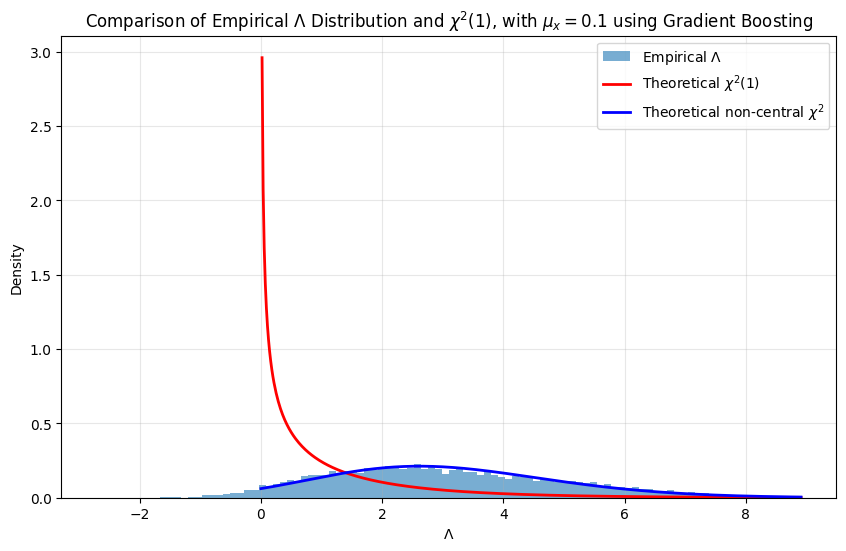

Fit parameters for non-central chi-squared distribution: (np.float64(33.15235920729407), np.float64(16.430344779804585), np.float64(-5.236693536285543), np.float64(0.16682311511438602))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2
from xgboost import XGBClassifier
import time_irreversibility_estimator as ie

n_simulations = 10000  # Numero di simulazioni
n_steps = 100  # Passi nelle traiettorie
mu_x_true = 0.1
std_dev_x_true = 1 

x_forward = np.cumsum(np.random.normal(mu_x_true, std_dev_x_true, (n_simulations, n_steps)), axis=1)
#x_backward = np.cumsum(np.random.normal(-mu_x_true, std_dev_x_true, (n_simulations, n_steps)), axis=1)
x_backward= -x_forward

X = np.vstack((x_forward, x_backward))  # Feature: intere traiettorie
y = np.concatenate((np.ones(n_simulations), np.zeros(n_simulations)))  # Target: 1 = Forward, 0 = Backward

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X, y)

#ATTENZIONE: se prima potevo definire una funzione per calcolare le likelihood, ora non posso più farlo. Perché?
#Perché la likelihood si può calcolare solo se si conosce la distribuzione di probabilità, e in questo caso non la conosco. In questo caso stimiamo la probabilità condizionata con il machine learning
p_forward = clf.predict_proba(X)[:, 1]  # Probabilità stimata di forward
#p_backward = 1 - p_forward
#p_backward = clf.predict_proba(X)[:, 0]  # Probabilità stimata di backward

Lambda_values = np.log(p_forward[:n_simulations]) - np.log(1 - p_forward[:n_simulations]) #ATTENZIONE!!!!!Qui ci va il *2? il /2? o lasciamo così è un punto ancora irrisolto

x_range = np.linspace(0, max(Lambda_values), 500)
chi2_pdf = chi2.pdf(x_range, df=1)

params = st.ncx2.fit(Lambda_values)
chi2_pdf_fit = st.ncx2.pdf(x_range, *params)

#aggiungo lo stimatore di KL fatto da Chri
encoding_fun = lambda x: np.diff(x, axis=0)
estimator = ie.TimeIrreversibilityEstimator(interaction_constraints=None, verbose=True, random_state=0)
irreversibility_value = estimator.fit_predict(x_forward=x_forward, x_backward=x_backward, encoding_fun=encoding_fun)
print(f"Estimated time irreversibility (KL): {irreversibility_value}")
print(f"KL teorica = {2*mu_x_true**2/std_dev_x_true**2}")

plt.figure(figsize=(10, 6))
plt.hist(Lambda_values, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$")
plt.plot(x_range, chi2_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit, label=r"Theoretical non-central $\chi^2$", color='blue', lw=2)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution and $\chi^2(1)$, with $\mu_x={mu_x_true}$ using Gradient Boosting")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Stampa dei parametri stimati della distribuzione non-centrale chi-quadro (il primo parametro è il numero di gradi di libertà)
print("Fit parameters for non-central chi-squared distribution:", params)


Per essere consistenti, facciamo sia la stima con likelihood sia la stima con XGBoost su un n° di traiettorie pari a n_simulation 

/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cristiano/ENTER/envs/t

KL stimata con likelihood= 0.10348355864154272
KL stimata con XGBoost= 0.21900351345539093


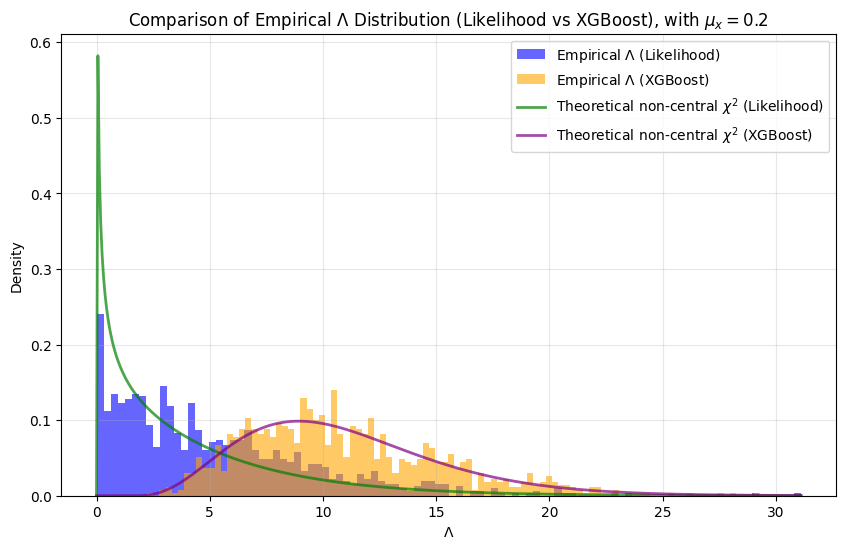

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2
from xgboost import XGBClassifier

n_simulations = 1000  # Numero di traiettorie (ogni traiettoria = un modello XGBoost)
n_steps = 100  
mu_x_true = 0.2  
std_dev_x_true = 1  

Lambda_values_likelihood = []
Lambda_values_xgb = []
KL_values_likelihood = []
KL_values_xgb = []

for _ in range(n_simulations):
    x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, n_steps)
    mu_x_est = np.mean(x_steps_observed)
    std_x_est = np.std(x_steps_observed, ddof=1)
    
    log_likelihood_ML = np.sum(norm.logpdf(x_steps_observed, loc=mu_x_est, scale=std_x_est))
    log_likelihood_alt = np.sum(norm.logpdf(x_steps_observed, loc=-mu_x_est, scale=std_x_est))
    
    Lambda_likelihood = 2 * (log_likelihood_ML - log_likelihood_alt)/4
    KL_likelihood = 2 * (mu_x_est**2 / std_x_est**2)

    x_backward = -x_steps_observed  

    X = np.concatenate((x_steps_observed.reshape(-1, 1), x_backward.reshape(-1, 1)), axis=0)
    y = np.concatenate((np.ones(n_steps), np.zeros(n_steps)))  # Label: 1 = forward, 0 = backward

    clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, min_child_weight=10)
    clf.fit(X, y)

    p_forward = clf.predict_proba(x_steps_observed.reshape(-1, 1))[:, 1]  # P(F | forward)
    p_backward = clf.predict_proba(x_backward.reshape(-1, 1))[:, 1]  # P(F | backward)

    Lambda_xgb = 2 * np.sum(np.log(p_forward) - np.log(p_backward))/4

    KL_xgb = np.mean(np.log(p_forward / p_backward))

    Lambda_values_likelihood.append(Lambda_likelihood)
    Lambda_values_xgb.append(Lambda_xgb)
    KL_values_likelihood.append(KL_likelihood)
    KL_values_xgb.append(KL_xgb)

# Convertiamo in array per operazioni più veloci
Lambda_values_likelihood = np.array(Lambda_values_likelihood)
Lambda_values_xgb = np.array(Lambda_values_xgb)

KL_values_likelihood = np.array(KL_values_likelihood)
KL_values_xgb = np.array(KL_values_xgb)
KL_media_likelihood = np.mean(KL_values_likelihood)
KL_media_xgb = np.mean(KL_values_xgb)
print(f"KL stimata con likelihood= {KL_media_likelihood}")
print(f"KL stimata con XGBoost= {KL_media_xgb}")

x_range = np.linspace(0, max(max(Lambda_values_likelihood), max(Lambda_values_xgb)), 500)
chi1_pdf = chi2.pdf(x_range, df=1)
params_likelihood = st.ncx2.fit(Lambda_values_likelihood)
params_xgb = st.ncx2.fit(Lambda_values_xgb)
chi2_pdf_fit_likelihood = st.ncx2.pdf(x_range, *params_likelihood)
chi2_pdf_fit_xgb = st.ncx2.pdf(x_range, *params_xgb)

plt.figure(figsize=(10, 6))
plt.hist(Lambda_values_likelihood, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$ (Likelihood)", color="blue")
plt.hist(Lambda_values_xgb, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$ (XGBoost)", color="orange")
#plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit_likelihood, label=r"Theoretical non-central $\chi^2$ (Likelihood)", color='green', lw=2, alpha=0.7)
plt.plot(x_range, chi2_pdf_fit_xgb, label=r"Theoretical non-central $\chi^2$ (XGBoost)", color='purple', lw=2, alpha=0.7)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution (Likelihood vs XGBoost), with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Ora provo a eliminare il ciclo for e fare tutto  vettoriale

/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KL stimata con likelihood= 0.10041611951382505
KL stimata con XGBoost= 0.07875262200832367


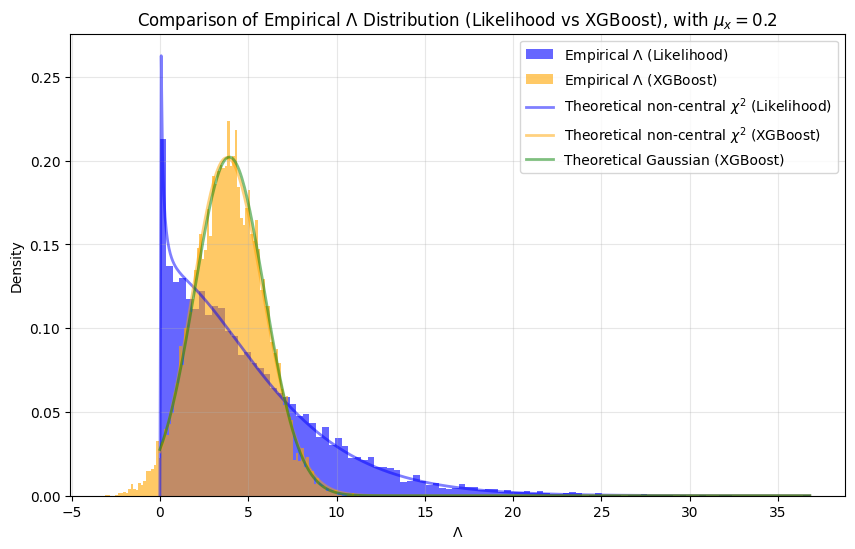

Gradient Boosting fit parameters for non-central chi-squared distribution: (np.float64(24.828736787429705), np.float64(399.00844524563877), np.float64(-16.745940474998235), np.float64(0.04880385581311328))
Gradient Boosting fit parameters for Gaussian distribution: (np.float32(3.9376314), np.float32(1.9732383))
Likelihood fit parameters for non-central chi-squared distribution: (np.float64(1.0873439166106391), np.float64(3.3975725883799193), np.float64(1.9804082995733548e-06), np.float64(1.0571967897619845))


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2
from xgboost import XGBClassifier

n_simulations = 10000  
n_steps = 100
mu_x_true = 0.2
std_dev_x_true = 1  

x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, (n_simulations, n_steps))
x_backward = -x_steps_observed  # Inversione temporale

mu_x_est = np.mean(x_steps_observed, axis=1)  # Media per ogni traiettoria
std_x_est = np.std(x_steps_observed, axis=1, ddof=1)  # Deviazione standard

log_likelihood_ML = np.sum(norm.logpdf(x_steps_observed, loc=mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)
log_likelihood_alt = np.sum(norm.logpdf(x_steps_observed, loc=-mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)

Lambda_likelihood =  (log_likelihood_ML - log_likelihood_alt)/2
KL_likelihood = 2 * (mu_x_est ** 2 / std_x_est ** 2)

#XGBoost
X = np.vstack((x_steps_observed.flatten().reshape(-1, 1), x_backward.flatten().reshape(-1, 1)))  # Feature: ogni punto della traiettoria separatamente
y = np.concatenate((np.ones(n_simulations * n_steps), np.zeros(n_simulations * n_steps)))  # Target: 1 = forward, 0 = backward

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, min_child_weight=10)
clf.fit(X, y)

#ora non posso usare il rapporto tra likelihood, uso le probabilità condizionate P(F|q)
p_forward = clf.predict_proba(x_steps_observed.flatten().reshape(-1, 1))[:, 1]  # P(F | forward)
p_backward = clf.predict_proba(x_backward.flatten().reshape(-1, 1))[:, 1]  # P(F | backward)

# Reshape corretto delle probabilità per adattarsi a (n_simulations, n_steps)
p_forward = p_forward.reshape(n_simulations, n_steps)
p_backward = p_backward.reshape(n_simulations, n_steps)

Lambda_xgb = np.sum(np.log(p_forward) - np.log(p_backward), axis=1)/2
KL_xgb = np.mean(np.log(p_forward / p_backward), axis=1)
KL_media_likelihood = np.mean(KL_likelihood)
KL_media_xgb = np.mean(KL_xgb) 
print(f"KL stimata con likelihood= {KL_media_likelihood}")
print(f"KL stimata con XGBoost= {KL_media_xgb}")

x_range = np.linspace(0, max(np.max(Lambda_likelihood), np.max(Lambda_xgb)), 500)
chi1_pdf = chi2.pdf(x_range, df=1)

params_likelihood = st.ncx2.fit(Lambda_likelihood)
params_xgb_gauss = st.norm.fit(Lambda_xgb)
params_xgb = st.ncx2.fit(Lambda_xgb)

chi2_pdf_fit_likelihood = st.ncx2.pdf(x_range, *params_likelihood)
chi2_pdf_fit_xgb = st.ncx2.pdf(x_range, *params_xgb)
gau_pdf_fit_xgb = st.norm.pdf(x_range, *params_xgb_gauss)

plt.figure(figsize=(10, 6))
plt.hist(Lambda_likelihood, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$ (Likelihood)", color="blue")
plt.hist(Lambda_xgb, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$ (XGBoost)", color="orange")
#plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit_likelihood, label=r"Theoretical non-central $\chi^2$ (Likelihood)", color='blue', lw=2, alpha=0.5)
plt.plot(x_range, chi2_pdf_fit_xgb, label=r"Theoretical non-central $\chi^2$ (XGBoost)", color='orange', lw=2, alpha=0.5)
plt.plot(x_range, gau_pdf_fit_xgb, label=r"Theoretical Gaussian (XGBoost)", color='green', lw=2, alpha=0.5)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution (Likelihood vs XGBoost), with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Gradient Boosting fit parameters for non-central chi-squared distribution:", params_xgb)
print("Gradient Boosting fit parameters for Gaussian distribution:", params_xgb_gauss)

print("Likelihood fit parameters for non-central chi-squared distribution:", params_likelihood)

Ora provo a usare la VERA formula di Lambda: $\Lambda=2*(logL(alt)-logL(null)) ma verrà una distribuzione in Lambda negative...

/home/cristiano/ENTER/envs/toolchristian2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KL stimata con likelihood= 0.04028277624911502
KL stimata con XGBoost= 0.0199903417378664


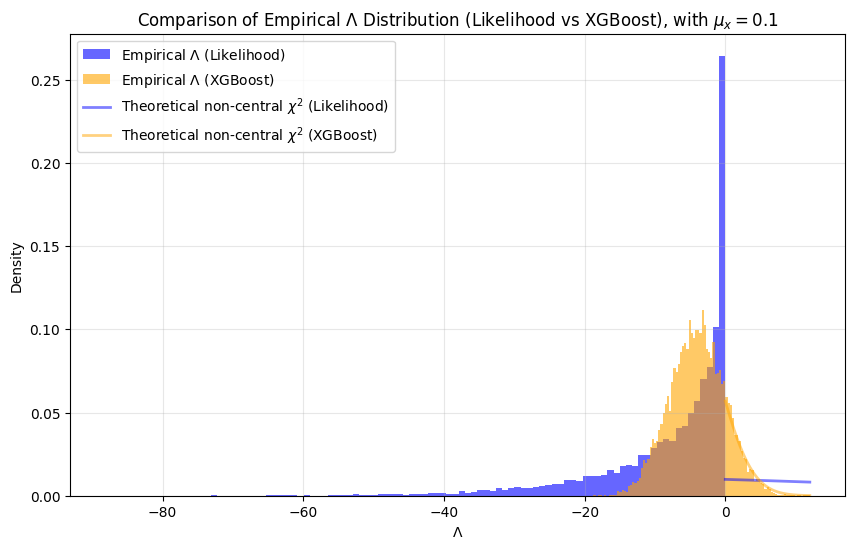

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm, chi2
from xgboost import XGBClassifier

n_simulations = 10000  
n_steps = 100 
mu_x_true = 0.1  
std_dev_x_true = 1  

x_steps_observed = np.random.normal(mu_x_true, std_dev_x_true, (n_simulations, n_steps))
x_backward = -x_steps_observed  # Inversione temporale

mu_x_est = np.mean(x_steps_observed, axis=1)  # Media per ogni traiettoria
std_x_est = np.std(x_steps_observed, axis=1, ddof=1)  # Deviazione standard

log_likelihood_ML = np.sum(norm.logpdf(x_steps_observed, loc=mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)
log_likelihood_alt = np.sum(norm.logpdf(x_steps_observed, loc=-mu_x_est[:, None], scale=std_x_est[:, None]), axis=1)

Lambda_likelihood =  2*(log_likelihood_alt - log_likelihood_ML)
KL_likelihood = 2 * (mu_x_est ** 2 / std_x_est ** 2)

#XGBoost
X = np.vstack((x_steps_observed.flatten().reshape(-1, 1), x_backward.flatten().reshape(-1, 1)))  # Feature: ogni punto della traiettoria separatamente
y = np.concatenate((np.ones(n_simulations * n_steps), np.zeros(n_simulations * n_steps)))  # Target: 1 = forward, 0 = backward

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, min_child_weight=10)
clf.fit(X, y)

#ora non posso usare il rapporto tra likelihood, uso le probabilità condizionate P(F|q)
p_forward = clf.predict_proba(x_steps_observed.flatten().reshape(-1, 1))[:, 1]  # P(F | forward)
p_backward = clf.predict_proba(x_backward.flatten().reshape(-1, 1))[:, 1]  # P(F | backward)

# Reshape corretto delle probabilità per adattarsi a (n_simulations, n_steps)
p_forward = p_forward.reshape(n_simulations, n_steps)
p_backward = p_backward.reshape(n_simulations, n_steps)

Lambda_xgb = np.sum(2*(np.log(p_backward)-np.log(p_forward)), axis=1)
KL_xgb = np.mean(np.log(p_forward / p_backward), axis=1)
KL_media_likelihood = np.mean(KL_likelihood)
KL_media_xgb = np.mean(KL_xgb) 
print(f"KL stimata con likelihood= {KL_media_likelihood}")
print(f"KL stimata con XGBoost= {KL_media_xgb}")

x_range = np.linspace(0, max(np.max(Lambda_likelihood), np.max(Lambda_xgb)), 500)
chi1_pdf = chi2.pdf(x_range, df=1)

params_likelihood = st.ncx2.fit(Lambda_likelihood)
params_xgb = st.ncx2.fit(Lambda_xgb)

chi2_pdf_fit_likelihood = st.ncx2.pdf(x_range, *params_likelihood)
chi2_pdf_fit_xgb = st.ncx2.pdf(x_range, *params_xgb)

plt.figure(figsize=(10, 6))
plt.hist(Lambda_likelihood, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$ (Likelihood)", color="blue")
plt.hist(Lambda_xgb, bins=100, density=True, alpha=0.6, label="Empirical $\Lambda$ (XGBoost)", color="orange")
#plt.plot(x_range, chi1_pdf, label=r"Theoretical $\chi^2(1)$", color='red', lw=2)
plt.plot(x_range, chi2_pdf_fit_likelihood, label=r"Theoretical non-central $\chi^2$ (Likelihood)", color='blue', lw=2, alpha=0.5)
plt.plot(x_range, chi2_pdf_fit_xgb, label=r"Theoretical non-central $\chi^2$ (XGBoost)", color='orange', lw=2, alpha=0.5)

plt.title(f"Comparison of Empirical $\Lambda$ Distribution (Likelihood vs XGBoost), with $\mu_x={mu_x_true}$")
plt.xlabel("$\Lambda$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Gradient Boosting fit parameters for non-central chi-squared distribution:", params_xgb)
print("Likelihood fit parameters for non-central chi-squared distribution:", params_likelihood)